# Setup

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../Dados/caracteristicas_produtos_saude_suplementar.csv', sep=';')

print(df.size)

df.head()

3587304


,ID_PLANO,CD_PLANO,NM_PLANO,CD_OPERADORA,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,VIGENCIA_PLANO,CONTRATACAO,GR_CONTRATACAO,SGMT_ASSISTENCIAL,GR_SGMT_ASSISTENCIAL,LG_ODONTOLOGICO,OBSTETRICIA,COBERTURA,TIPO_FINANCIAMENTO,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA,SITUACAO_PLANO,DT_SITUACAO,DT_REGISTRO_PLANO,DT_ATUALIZACAO
0,16346253,457189084,Especial Empresarial/PME Odontológico COP,6246,Sul America Companhia De Seguro Saúde,Seguradora,Grande,P,Coletivo empresarial,Coletivo empresarial,Odontológico,Exclusivamente Odontológico,1,Não se Aplica,Odontológica,Preestabelecido,Nacional,Coparticipacão,Não se Aplica,Parcial sem internação,Ativo,2019-11-22,2008-05-07,2023-08-24
1,16346265,457193082,Máximo Empresarial/PME Odontológico COP,6246,Sul America Companhia De Seguro Saúde,Seguradora,Grande,P,Coletivo por adesão,Coletivo por adesão,Odontológico,Exclusivamente Odontológico,1,Não se Aplica,Odontológica,Preestabelecido,Nacional,Coparticipacão,Não se Aplica,Parcial sem internação,Suspenso,2013-05-30,2008-05-07,2023-08-24
2,16346520,20708,PME GLOBAL TRAD SEM TIPO - SEM AIDS - ESPECIAL,6246,Sul America Companhia De Seguro Saúde,Seguradora,Grande,A,Coletivo empresarial,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Ambulatorial + Hospitalar,0,Com Obstetrícia,Médico-hospitalar,Não Informado,Nacional,Ausente,Não Informado,Total,Transferido,2013-05-07,NaN,2023-08-24
3,16346538,20805,GRUPAL GLOBAL - EXECUTIVO II,6246,Sul America Companhia De Seguro Saúde,Seguradora,Grande,A,Coletivo empresarial,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Ambulatorial + Hospitalar,0,Com Obstetrícia,Médico-hospitalar,Não Informado,Nacional,Ausente,Não Informado,Total,Transferido,2013-05-07,NaN,2023-08-24
4,18227374,485073204,DIRETO CWB STc Adesão Trad.16 F AHO QC COP,6246,Sul America Companhia De Seguro Saúde,Seguradora,Grande,P,Coletivo por adesão,Coletivo por adesão,Ambulatorial + Hospitalar com obstetrícia,Ambulatorial + Hospitalar,0,Com Obstetrícia,Médico-hospitalar,Preestabelecido,Grupo de municípios,Coparticipacão,Coletiva,Parcial sem internação,Ativo,2020-03-06,2020-03-06,2023-08-24


# Tratamento Inicial

## Tratando Valores Nulos:

In [3]:
##################################
#### VERIFICANDO DADOS NULOS: ####
##################################

df.isnull().sum()

ID_PLANO                     0
CD_PLANO                     2
NM_PLANO                     1
CD_OPERADORA                 0
RAZAO_SOCIAL                 0
GR_MODALIDADE                0
PORTE_OPERADORA              0
VIGENCIA_PLANO               0
CONTRATACAO                  0
GR_CONTRATACAO               0
SGMT_ASSISTENCIAL            0
GR_SGMT_ASSISTENCIAL         0
LG_ODONTOLOGICO              0
OBSTETRICIA                  0
COBERTURA                    0
TIPO_FINANCIAMENTO           0
ABRANGENCIA_COBERTURA        0
FATOR_MODERADOR              0
ACOMODACAO_HOSPITALAR        0
LIVRE_ESCOLHA                0
SITUACAO_PLANO               0
DT_SITUACAO                  0
DT_REGISTRO_PLANO        37999
DT_ATUALIZACAO               0
dtype: int64

### Análise para CD_PLANO:

In [4]:
# Verificando os valores nulos do Plano...

df[df['CD_PLANO'].isnull()]

,ID_PLANO,CD_PLANO,NM_PLANO,CD_OPERADORA,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,VIGENCIA_PLANO,CONTRATACAO,GR_CONTRATACAO,SGMT_ASSISTENCIAL,GR_SGMT_ASSISTENCIAL,LG_ODONTOLOGICO,OBSTETRICIA,COBERTURA,TIPO_FINANCIAMENTO,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA,SITUACAO_PLANO,DT_SITUACAO,DT_REGISTRO_PLANO,DT_ATUALIZACAO
60803,1523432,NaN,PLANO ANTIGO,364312,Unimed De Araraquara - Coop. De Trab. Médico,Cooperativa Médica,Médio,A,Coletivo por adesão,Coletivo por adesão,Ambulatorial + Hospitalar com obstetrícia,Ambulatorial + Hospitalar,0,Com Obstetrícia,Médico-hospitalar,Não Informado,Grupo de municípios,Ausente,Não Informado,Total,Suspenso,2006-07-05,NaN,2023-08-24
142943,1513152,NaN,NaN,326755,Associação Evangelica Beneficente De Londrina,Filantropia,Médio,A,Individual ou familiar,Individual ou Familiar,Hospitalar com obstetrícia,Hospitalar,0,Com Obstetrícia,Médico-hospitalar,Não Informado,Municipal,Ausente,Não Informado,Total,Suspenso,2005-07-28,NaN,2023-08-24


In [5]:
# Mostrando a porcentagem (%) dos valores nulos do CD_PLANO no DataFrame:

len(df[df['CD_PLANO'].isnull()])/len(df) * 100

0.0013380521974162211

In [6]:
# Os valores nulos do CD_PLANO foram removidos do DataFrame, por representarem um volume de dados pequeno:

df = df.dropna(subset = ['CD_PLANO'])

### Análise para o DT_REGISTRO_PLANO:

In [7]:
# Mostrando a porcentagem (%) dos valores nulos do DT_REGISTRO_PLANO no DataFrame:

len(df[df['DT_REGISTRO_PLANO'].isnull()])/len(df) * 100

25.421324823207485

25% das linhas de dados apresentam o DT_REGISTRO_PLANO como nulo. <p>
Desse modo, esses valores não podem ser descartados, pois influenciaria na modelagem e na análise de dados.

## Verificando o Tipo das Colunas:

In [8]:
############################################
#### VERIFICANDO O TIPO DE CADA COLUNA: ####
############################################

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149469 entries, 0 to 149470
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_PLANO               149469 non-null  int64 
 1   CD_PLANO               149469 non-null  object
 2   NM_PLANO               149469 non-null  object
 3   CD_OPERADORA           149469 non-null  int64 
 4   RAZAO_SOCIAL           149469 non-null  object
 5   GR_MODALIDADE          149469 non-null  object
 6   PORTE_OPERADORA        149469 non-null  object
 7   VIGENCIA_PLANO         149469 non-null  object
 8   CONTRATACAO            149469 non-null  object
 9   GR_CONTRATACAO         149469 non-null  object
 10  SGMT_ASSISTENCIAL      149469 non-null  object
 11  GR_SGMT_ASSISTENCIAL   149469 non-null  object
 12  LG_ODONTOLOGICO        149469 non-null  int64 
 13  OBSTETRICIA            149469 non-null  object
 14  COBERTURA              149469 non-null  object
 15  

Nessa etapa, alguns dados tiveram sua natureza alterados. <p>
O dicionário de dados trouxe algumas informações sobre as *features* que eu não compreendi o sentido, tais como **NM_PLANO ser uma DATA**. <p>
Optei por trabalhar da forma como acredito que faça mais sentido para mim. Se não fosse um *case*, eu iria perguntar se essas alterações poderiam ser realizadas. <p>

### Tratando Dados que deveriam ser *Datetime*

In [9]:
df['DT_SITUACAO'] = pd.to_datetime(df['DT_SITUACAO'], format='%Y-%m-%d')
df['DT_REGISTRO_PLANO'] = pd.to_datetime(df['DT_REGISTRO_PLANO'], format='%Y-%m-%d')
df['DT_ATUALIZACAO'] = pd.to_datetime(df['DT_ATUALIZACAO'], format='%Y-%m-%d')

## Verificando a Unicidade dos Dados:

Compreendo que nem todos os dados sejam únicos, ou que sejam completamente diferentes. <p>
EM uma análise de predição, acho que é importante conhecer quantas informações distintas existem no conjunto de cada *feature*. <p>
Por exemplo, se o *ID_PLANO* apresentar um valor diferente para cada linha do DataFrame, essa informação, embora seja relevante para os dados em relação ao cliente, não exercem influência em uma análise de predição, ocasionando em gasto computacional sem agregar na acertividade. Desse modo, julgo ser relevante essa análie.

In [10]:
colunas = df.columns
tamanho_df = len(df)

for i in range(len(colunas)):
    dados_unicos = len(df[df.columns[i]].unique())
    porcentagem = round((dados_unicos / tamanho_df) * 100, 2)
    if porcentagem > 80:
        print(df.columns[i], ': ')
        print('Qtde -  ', dados_unicos)
        print('Porc -  ', round((dados_unicos / tamanho_df) * 100, 2))


ID_PLANO : 
Qtde -   149469
Porc -   100.0


Desse modo, o ID_PLANO não é uma *feature* relevante para os modelos de Predição.

# Análise Exploratória

In [11]:
# Importando o Seaborn:

import seaborn as sns
import matplotlib as plt

In [12]:
# Informações relevantes do DataFrame:

df.describe(include='object')

,CD_PLANO,NM_PLANO,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,VIGENCIA_PLANO,CONTRATACAO,GR_CONTRATACAO,SGMT_ASSISTENCIAL,GR_SGMT_ASSISTENCIAL,OBSTETRICIA,COBERTURA,TIPO_FINANCIAMENTO,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA,SITUACAO_PLANO
count,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469,149469
unique,118630,90529,2870,8,4,2,7,4,15,4,4,2,4,6,4,4,4,4
top,1,UNIPLAN,Amil Assistência Médica Internacional S.A.,Medicina De Grupo,Sem beneficiários,P,Coletivo empresarial,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Ambulatorial + Hospitalar,Com Obstetrícia,Médico-hospitalar,Não Informado,Grupo de municípios,Ausente,Não Informado,Ausente,Cancelado
freq,156,991,5001,61910,51629,111472,60295,60295,82686,112860,103523,134635,79823,75673,110118,68540,101805,58729


### Gráficos:

#### Quantidade de planos por SGMT_ASSISTENCIAL

Text(0, 0.5, ' ')

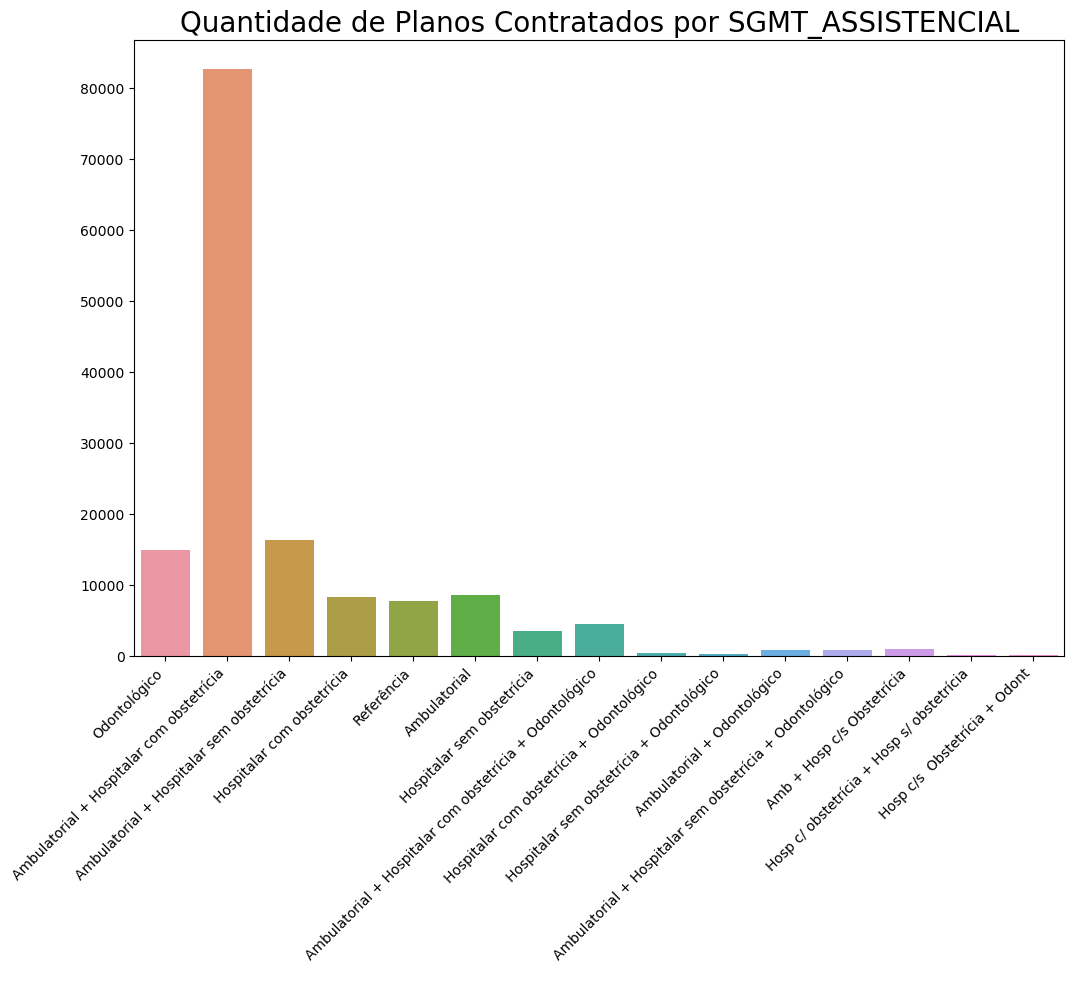

In [13]:
ax = sns.countplot(x = 'SGMT_ASSISTENCIAL', data=df)
ax.figure.set_size_inches(12, 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Quantidade de Planos Contratados por SGMT_ASSISTENCIAL', fontsize = 20 )
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### Quantidade de planos por ABRANGENCIA_COBERTURA

Text(0, 0.5, ' ')

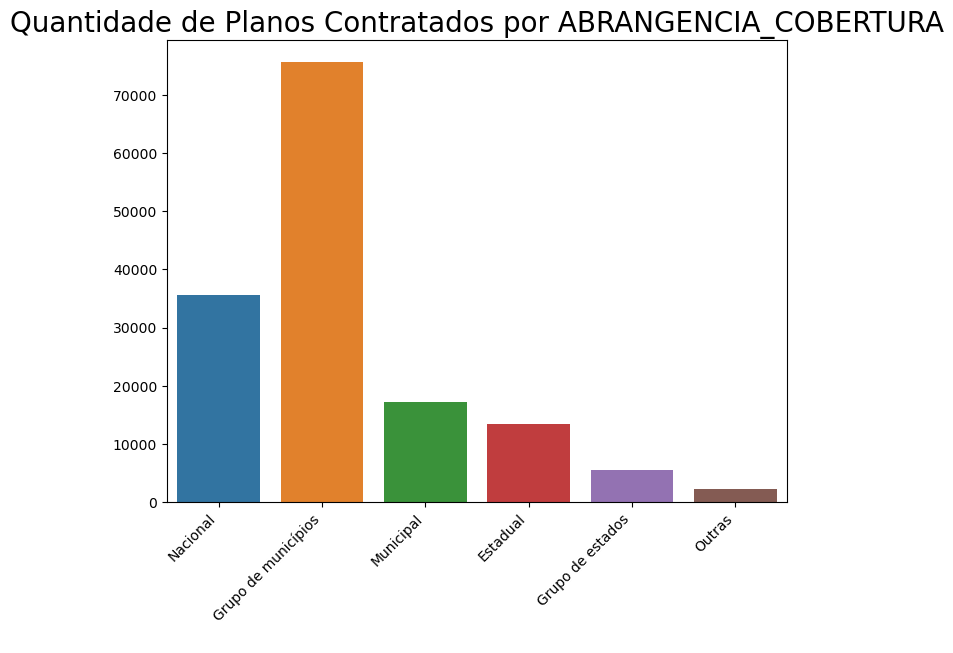

In [14]:
ax = sns.countplot(x = 'ABRANGENCIA_COBERTURA', data=df)
ax.figure.set_size_inches(8, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Quantidade de Planos Contratados por ABRANGENCIA_COBERTURA', fontsize = 20 )
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### Quantidade de planos por ABRANGENCIA_COBERTURA

Text(0, 0.5, ' ')

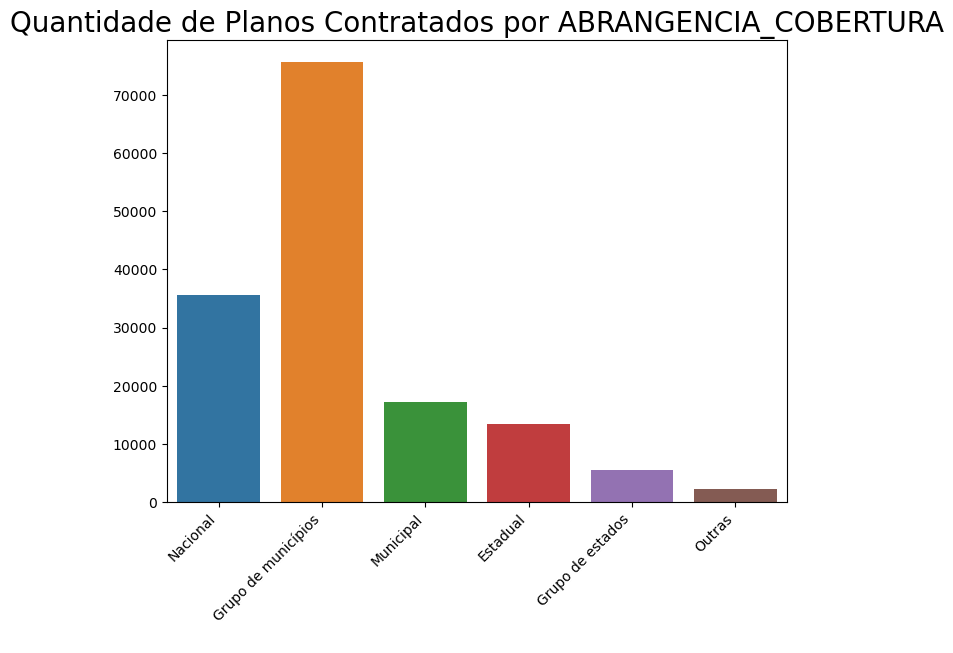

In [15]:
ax = sns.countplot(x = 'ABRANGENCIA_COBERTURA', data=df)
ax.figure.set_size_inches(8, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Quantidade de Planos Contratados por ABRANGENCIA_COBERTURA', fontsize = 20 )
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### Quantidade de planos por SITUACAO_PLANO

Text(0, 0.5, ' ')

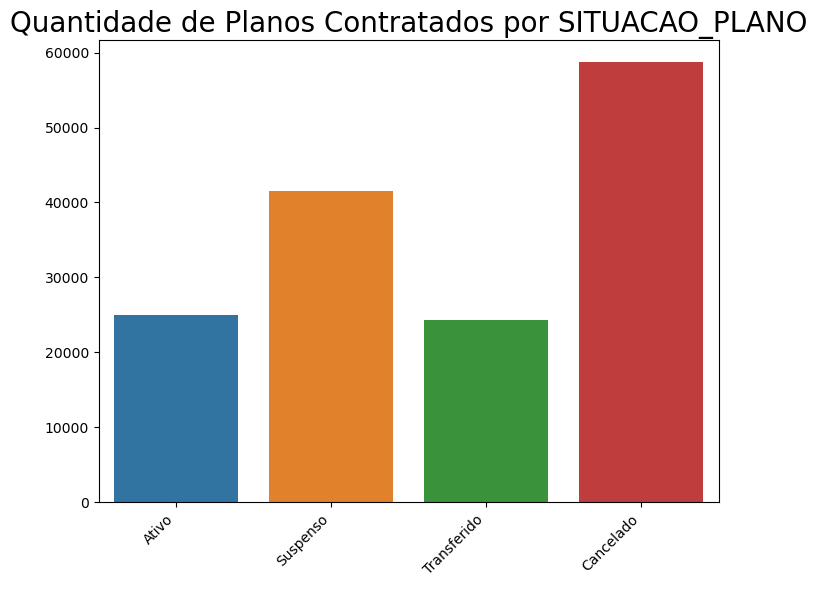

In [16]:
ax = sns.countplot(x = 'SITUACAO_PLANO', data=df)
ax.figure.set_size_inches(8, 6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Quantidade de Planos Contratados por SITUACAO_PLANO', fontsize = 20 )
ax.set_xlabel(' ')
ax.set_ylabel(' ')

Alguns gráficos foram plotados para auxiliar a conhecer melhor os dados. <p>
Com base no comportamento das *features*, optei por utilizar o Aprendizado de Máquinas para prever a SITUACAO_PLANO para os planos contratados nos últimos 6 meses. <p>
Os gráficos gerados poderiam ser gerados com um laço de repetição... Mas preferi fazer dessa maneira para absorver melhor as informações que julguei pertinentes.

# Modelo Preditivo

O modelo preditivo pode ser realizado de diferentes maneiras. E também é possível alterar inúmeros parâmetros no modelo... Entretanto, devido ao tempo de desenvolvimento, uma quantidade menor de análises será realizada.

## Tratamento dos Dados

**IMPORTANTE:** Eu entendi que é para utilizar modelos de predição para prever o comportamento/informação quanto à *SGMT_ASSISTENCIAL* para os contratos dos últimos 6 meses. 

Outras previsões podem ser realizadas também. Mas, devido ao tempo, preferi focar em utilizar como variável alvo apenas o *SGMT_ASSISTENCIAL*, conforme estava no teste do Case.

### Importando Bibliotecas Necessárias:

In [17]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Pré-Processamento

A maioria das técnicas de previsão se baseiam na utilização de variáveis numéricas, e não categóricas. <p>
Desse modo, a primeira ação que devemos realizar é normalizar os *labels*. Existem diversas maneiras, mas eu prefiro utilizar o *LabelEncoder()*

**IMPORTANTE:** Teoricamente, a primeira análise deveria considerar todas as features. Porém, em algumas POCs anteriores, eu percebi que esse nem sempre é o melhor caminho , devido ao tempo, optei por escolher algumas variáveis que, a primeira vista, parecem ser relevantes ao problema. Consequentemente, variáveis que parecem não influenciar, não seriam consideradas na análise e, por isso, não seria necessário a sua normalização.

In [70]:
# Transformando as Variáveis que, num primeiro momento, parecem pertinentes ao problema
# Um novo DataFrame foi criado, para minimizar a quantidade de dados movimentados.

le = preprocessing.LabelEncoder()
dados = pd.DataFrame()

dados['ID_PLANO'] = df['ID_PLANO']
dados['RAZAO_SOCIAL'] = le.fit_transform(df['RAZAO_SOCIAL']) 
dados['GR_MODALIDADE'] = le.fit_transform(df['GR_MODALIDADE']) 
dados['PORTE_OPERADORA'] = le.fit_transform(df['PORTE_OPERADORA']) 
dados['VIGENCIA_PLANO'] = le.fit_transform(df['VIGENCIA_PLANO']) 
dados['CONTRATACAO'] = le.fit_transform(df['CONTRATACAO']) 
dados['TIPO_FINANCIAMENTO'] = le.fit_transform(df['TIPO_FINANCIAMENTO']) 
dados['ABRANGENCIA_COBERTURA'] = le.fit_transform(df['ABRANGENCIA_COBERTURA']) 
dados['FATOR_MODERADOR'] = le.fit_transform(df['FATOR_MODERADOR']) 
dados['SITUACAO_PLANO'] = le.fit_transform(df['SITUACAO_PLANO']) 
dados['SGMT_ASSISTENCIAL'] = le.fit_transform(df['SGMT_ASSISTENCIAL']) 
dados['DT_SITUACAO'] = df['DT_SITUACAO']

### Train Teste Split

Segundo as informações do teste do case, será necessário separar os últimos 6 meses para teste e, as demais datas, para treinamento do modelo.  <p>
Existem três datas diferentes no conjunto de dados. Observando o dicionário de dados, entendi que será necessário separar os dados através da coluna DT_SITUACAO.

In [71]:
# Separando ano e mês em novas colunas:

dados['Ano'] = pd.DatetimeIndex(dados['DT_SITUACAO']).year
dados['Mês'] = pd.DatetimeIndex(dados['DT_SITUACAO']).month

In [72]:
# Condição para os dados servirem para o teste:
teste = dados.loc[(dados['Ano'] == 2023) & (dados['Mês'] > (8-6))]

# Separando os demais dados para Treino:
mask = dados.index.isin(teste.index)
treino = dados[~mask]

# Verificando se a separação abrangiu a totalidade dos dados:
len(dados) == len(teste) + len(treino)

True

In [73]:
# Organizando as Features para a Modelagem:

x = dados.drop(['ID_PLANO', 'SGMT_ASSISTENCIAL', 'Ano', 'Mês', 'DT_SITUACAO', 'RAZAO_SOCIAL'], axis = 1).columns
y = 'SGMT_ASSISTENCIAL'

### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, bootstrap = False)
clf.fit(treino[x], treino[y])
previsao_rf = clf.predict(teste[x])

In [78]:
#### Analisando o Modelo:
from sklearn.metrics import accuracy_score

acurácia = accuracy_score(teste[y], previsao_rf)

print('Acurácia:', acurácia)


Acurácia: 0.7306567920483337


### GaussianNB:

In [79]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model = gnb.fit(treino[x], treino[y])

previsao_gnb = gnb.predict(teste[x])


#### Analisando o Modelo:
from sklearn.metrics import accuracy_score

acurácia_gnb = accuracy_score(teste[y], previsao_gnb)

print('Acurácia:', acurácia_gnb)

Acurácia: 0.05593451568894952


### Comentários e Conclusões

1. Devido ao tempo e à limitação computacional, não consegui testar o modelo com todo o conjunto de dados.
2. A separação da data para o último mês poderia ser realizada de modo mais eficiente, mas estava retornando um problema em um dos índices ao fazer a conta e, para agilizar na análise, alterei o método de separação dos dados.
3. Dois modelos distintos foram realizados. Seria interessante utilizar uma técnica de validação cruzada que verificasse diferentes parâmetros em um range maior de análises também; por exemplo, testar outros critérios para o RF, alterar a profundidade máxima, entre outras análises.
4. Se conseguisse rodar os modelo do RF com todos os dados, eu iria mapear a contribuição com o *Feature Selection* e, posteriormente, rodar o modelo novamente para ver se haveria um refinamento na modelagem.
5. O Coeficiente de Determinação dos dois modelos foram baixas. Nesse momento, irei manter os dados como estão; entretanto, em um trabalho real, eu iria partir para a busca na literatura sobre outros modelos para auxliar na previsão (manualmente, eu testei outros parâmetros e os resultados não foram melhores, por isso acho que seria necessário alterar o modelo de predição)
6. Para continuar com o teste, optei por continuar com os dados provenientes do Random Forest Classifier.

### Organizando o DataFrame:

In [ ]:
ids = teste['ID_PLANO'].unique()

df_treinado = df[df['ID_PLANO'].isin(ids)]
df_treinado['Previsão'] = previsao_rf
df_treinado['Código do Plano'] = teste[y]
df_treinado['Assertividade'] = df_treinado['Previsão'] == df_treinado['Código do Plano']
df_treinado.reset_index(inplace=True)
df_treinado.drop('index', axis=1, inplace = True)


/tmp/ipykernel_73150/3686216705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treinado['Previsão'] = previsao_rf
/tmp/ipykernel_73150/3686216705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treinado['Código do Plano'] = teste[y]
/tmp/ipykernel_73150/3686216705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# Salvando o DataFrame:

In [ ]:
df_treinado.to_csv('../Dados/Dados_Tratados.csv', index=False)